### In this part we are going to teach computer how to identify different objects 

<li><b>For Example, In the following figure, how many shows do we see?</b></li>

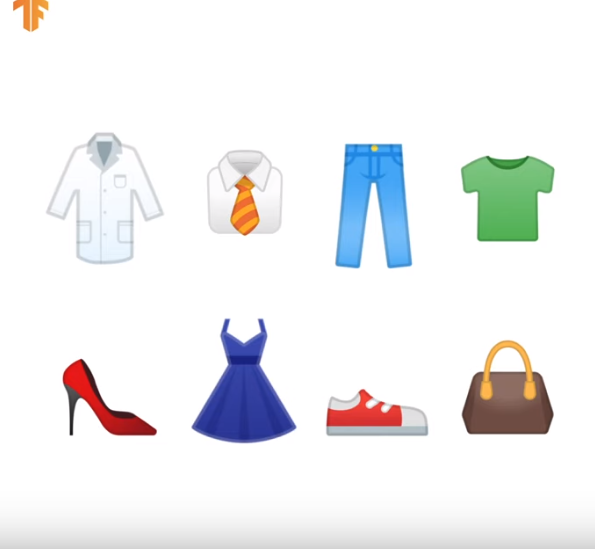

<li>There are 2 Shoes Right, but how do we know that they are shoes?</li>
<li>Because In our life we have seen lots of people wearing shoes and we have learnt how shoe looks like.</li>
<li><b>The logic follows same here too</b></li>
<li>We show the computer lots of shoes and it will be able to recognise what a shoe.</li>

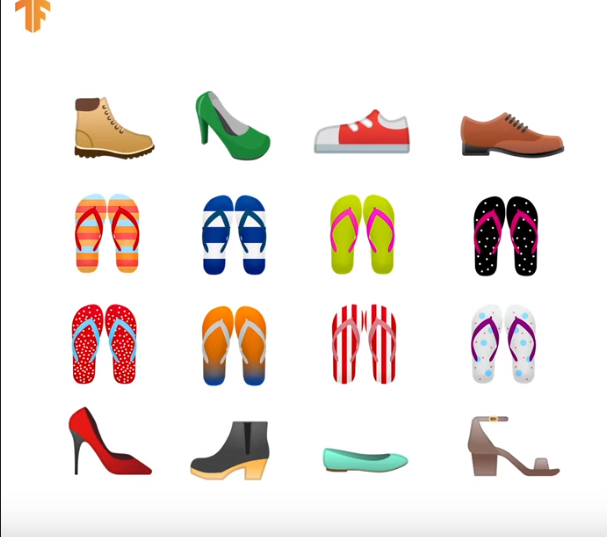

<li>And thats were the data set called <b>Fashion MNIST</b> is useful</li>
<li> It has 7ok images in 10 different categores</li>
<li>That means about 7000 categories of shoes are present in it and this data could be more than enough for a computer to learn</li>
<li>The Images are only 28*28, they are pretty small </li>

### Now lets take a look Into the coding section 
<li>We will start by loading the data </li>

In [1]:
import tensorflow as tf #import tensorflow
from tensorflow import keras 

<li><b>The Fashion MNIST data is available directly in the tf.keras datasets API</b></li>

In [2]:
print(tf.__version__)

2.1.0


<li><b>The Fashion MNIST data is available directly in the tf.keras datasets API</b><li>

In [4]:
mnist = tf.keras.datasets.fashion_mnist

<li>Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.</li>
<li>Training images are set of 60 thousand Images<li>
<li> Other 10 thousand are test set we can use to check to see how well our NN performs</li>



In [6]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


<li>What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0<li>

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

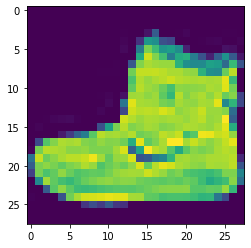

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

We will  notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. we will do it like this:

In [8]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5004 - accuracy: 0.8229s - loss: 0.516
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3782 - accuracy: 0.8625
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3401 - accuracy: 0.8765
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3116 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2947 - accuracy: 0.8911


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3520 - accuracy: 0.8741s - loss: 0.3550 - accuracy: 0.


[0.35203694801330565, 0.8741]

### Reference: https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=GSZSwV5UObQP